# Import Libraries

In [2]:
import pandas as pd
import sys
import os
import pathlib
import numpy as np
import random

# Add source directory to be able to import libraries
sys.path.insert(1, os.path.join(sys.path[0], '../src'))
from kmeans.kmeans_model import KMeans 
from maths import vectors
from maths.vectors import Vector

In [3]:
import matplotlib.pyplot as plt

# Creation of a dataset to play with

In [117]:
# Create 2 points, and each point has 2 coordinates
random.seed(12)
n_points = 20
points = []

y_max = 40
y_min = -30

x_max = 30
x_min = -60

# Generate coordinates
x = [random.randrange(x_min, x_max) for x in range(n_points)]
y = [random.randrange(y_min, y_max) for y in range(n_points)]

x = np.array(x)
y = np.array(y)

# Creation of the vector objects:
vectors = []
for i in range(len(x)):
    vectors.append(Vector([x[i], y[i]]))

# Visualize the dataset 

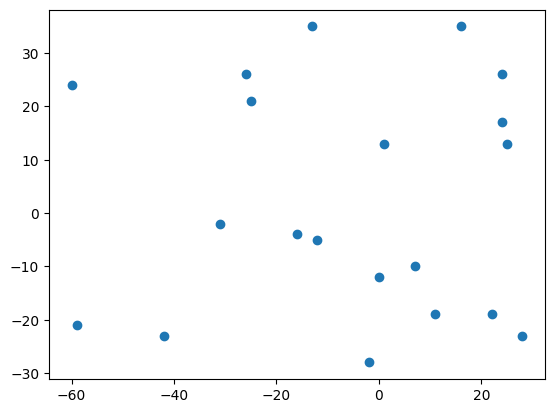

In [118]:
plt.scatter(x, y)

# Create a KMeans model

In [130]:
# We'll try to separate the points into 3 clusters
# And store the intermediate steps for a later analysis
kmeans = KMeans(num_clusters=3, 
               save_intermediate_steps=True)

# Train the model with the data
kmeans.train(inputs=vectors)

iteration: 2 | Changes: 1 / 20: : 3it [00:00, 272.62it/s]


# Visualize each step

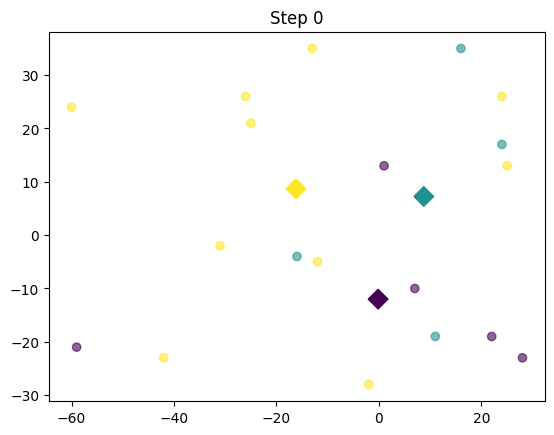

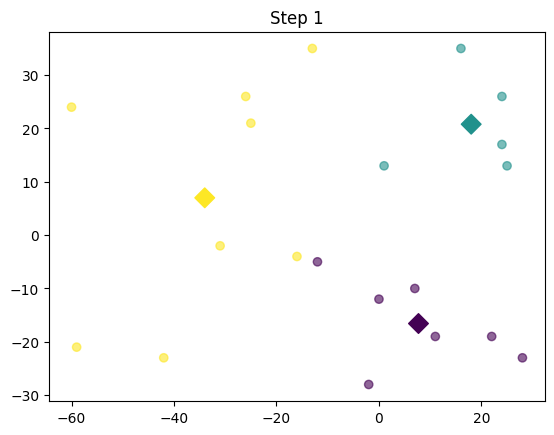

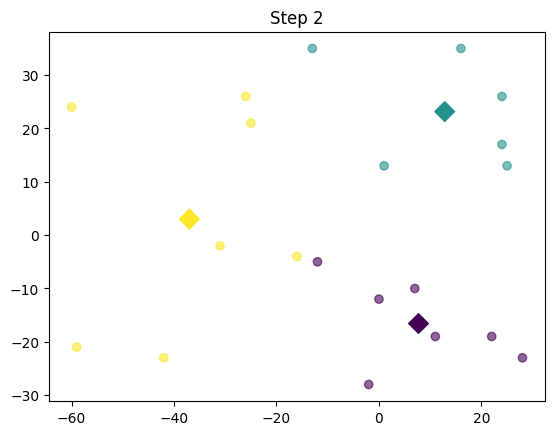

In [128]:
for index_step, step in enumerate(kmeans.intermediate_steps):

    clusters = step['state']

    # Draw each input
    plt.scatter(x, y, c=clusters, alpha=0.6)

    # Draw Centroids
    x_centroid = np.array([centroid.get(0) for centroid in step['centroids']])
    y_centroid = np.array([centroid.get(1) for centroid in step['centroids']])
    plt.scatter(x_centroid, y_centroid,
                marker= 'D', 
                s=100, 
                c=[x for x in range(kmeans.num_clusters)])
    
    plt.title(f"Step {index_step}")


    plt.show()


# Visualize each step in a subplot

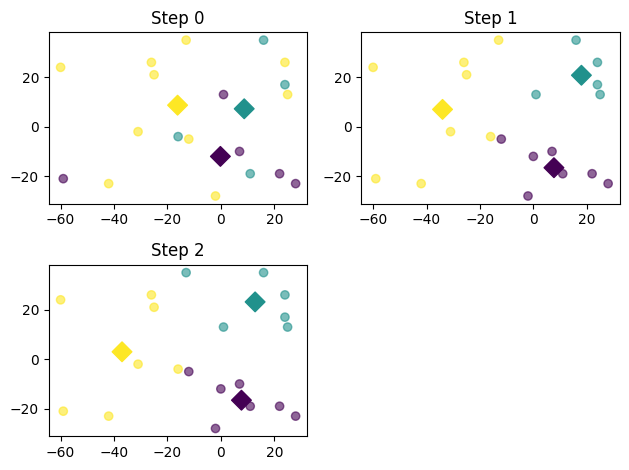

In [122]:
num_columns = 2


for index_step, step in enumerate(kmeans.intermediate_steps):

    clusters = step['state']

    plt.subplot(math.ceil(len(kmeans.intermediate_steps)/num_columns), num_columns, index_step + 1)
    # Draw each input
    plt.scatter(x, y, c=clusters, alpha=0.6)

    # Draw Centroids
    x_centroid = np.array([centroid.get(0) for centroid in step['centroids']])
    y_centroid = np.array([centroid.get(1) for centroid in step['centroids']])
    plt.scatter(x_centroid, y_centroid,
                marker= 'D', 
                s=100, 
                c=[x for x in range(kmeans.num_clusters)])
    
    plt.title(f"Step {index_step}")
    plt.tight_layout()
    
plt.show()
